<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from PIL import Image

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [55]:

hh_data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
hh_data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [56]:
display(hh_data.head(3))
display(hh_data.tail(3))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


In [57]:
hh_data_copy = hh_data.copy()

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [58]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [59]:
hh_data.isnull().mean()

Пол, возраст                       0.000000
ЗП                                 0.000000
Ищет работу на должность:          0.000000
Город, переезд, командировки       0.000000
Занятость                          0.000000
График                             0.000000
Опыт работы                        0.003755
Последнее/нынешнее место работы    0.000022
Последняя/нынешняя должность       0.000045
Образование и ВУЗ                  0.000000
Обновление резюме                  0.000000
Авто                               0.000000
dtype: float64

5. Выведите основную статистическую информацию о столбцах.


In [60]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [61]:
#Разобьем строки по элементам. Оставим элементы предполагаемого уровня образования (первые 2 слова)"
def education1(x):
    return x.split()[:2]
#Удалим слово "образование"
def education2(x):
    return x[0] if x[1] == 'образование' else x[0]+' '+x[1]
#Созданим и преобразуем параметр 'Образование'
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education1)
hh_data['Образование'] = hh_data['Образование'].apply(education2)
#Удалим параметр 'Образование и ВУЗ'
hh_data = hh_data.drop(columns = 'Образование и ВУЗ', axis = 1)
hh_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [62]:
#Сколько соискателей имеет средний уровень образования (школьное образование)?
hh_data['Образование'].value_counts().loc['Среднее']

559

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [63]:
#Так как структура данных подрузамевает что, вначале всегда идет пол, мы можем просто взять первый символ стоки, это и будет значение пола.
def gender(x):
#Определим возраст и преведем его к целочисленному значению
    return x[0]
def age(x):
    return int(x.split()[2])
hh_data['Пол'] = hh_data['Пол, возраст'].apply(gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(age)
##Удалим параметр 'Образование и ВУЗ'
hh_data = hh_data.drop(columns = 'Пол, возраст', axis = 1)


In [64]:
#Сколько процентов женских резюме представлено в наших данных?
hh_data['Пол'].value_counts(normalize=True)*100

М    80.929287
Ж    19.070713
Name: Пол, dtype: float64

In [65]:
#Чему равен средний возраст соискателей?
hh_data['Возраст'].mean()

32.19674146254246

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [66]:
#Создадим функцию по подсчету опыта работы
def experience(x):
    
#Определим пустые значения и неявно пустые
    if x is np.nan:
        return np.nan
    if x == 'Не указано':
        return np.nan
    
#Определим опыт в годах и месяцах и приведем к суммарному колличеству месяцев. Значение представим целыми числами
    list_1 = x.split()[2:6]
    month = ['месяц', 'месяцев', 'месяца']
    years = ['год', 'года', 'лет']
    y = 0
    m = 0
    for i in range(len(list_1)):
        if list_1[i] in month:
            m= int(list_1[i-1])
        if list_1[i] in years:
            y = int(list_1[i-1])
    return m+y*12
hh_data['Опыт работы'] = hh_data['Опыт работы'].apply(experience)

In [67]:
#Чему равен медианный опыт работы (в месяцах) в нашей таблице?
hh_data['Опыт работы'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [68]:
#Список городов миллиоников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'] 

#Определим горд
def sity(x):
    list_2 = str(x).split()[0]
    if list_2 in million_cities:
         return 'город-миллионник'
    elif list_2 == 'Москва':
        return 'Москва'
    elif list_2 == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'другие'
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(sity)

In [69]:
#Сколько процентов соискателей живут в Санкт-Петербурге?
round(hh_data['Город'].value_counts(normalize=True).loc['Санкт-Петербург'], 2) * 100

11.0

In [70]:
#Определим готовность к переездум
def move(x):
    list_1 = str(x).split()
    move_Y = ['готов', 'готова', 'хочу']
    for i in range(len(list_1)):
        if list_1[i] in move_Y:
            if list_1[i-1] == 'не':
                return False
            else:
                return True
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(move)
round(hh_data['Готовность к переезду'].value_counts(normalize=True), 2) * 100

False    64.0
True     36.0
Name: Готовность к переезду, dtype: float64

In [71]:
#Определим готовность к командировкам
def business_trip(x):
    list_1 = str(x).split(',')[-1]
    move_Y = [' готов к командировкам', ' готов к редким командировкам', ' готова к командировкам', ' готова к редким командировкам']
    move_N = [' не готов к командировкам', ' не готова к командировкам']
    if list_1 in move_Y:
        return True
    if list_1 in move_N:
        return False
    return np.nan
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(business_trip)
round(hh_data['Готовность к командировкам'].value_counts(normalize=True), 2) * 100

True     71.0
False    29.0
Name: Готовность к командировкам, dtype: float64

In [72]:
#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?
(round(hh_data[(hh_data['Готовность к командировкам'] == True) & (hh_data['Готовность к переезду'] == True)].shape[0]/hh_data.shape[0] * 100, 0))

32.0

In [73]:
##Удалим параметр 'Город, переезд, командировки'
hh_data = hh_data.drop(columns = 'Город, переезд, командировки', axis = 1)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [74]:
#Создадим признаки-мигалки для 'Занятость'
employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
for i in employment:
    def employments(x):
        if i in x:
            return True
        else:
            return False
    hh_data[i] = hh_data['Занятость'].agg(employments)


In [75]:
#Создадим признаки-мигалки для "График"
schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for i in schedule:
    def schedules(x):
        if i in x:
            return True
        else:
            return False
    hh_data[i] = hh_data['График'].agg(schedules)


In [76]:
#Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0]

436

In [77]:
#Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0]

2311

In [78]:
##Удалим параметр 'Занятость' и 'График'
hh_data.drop(columns=['Занятость', 'График'], inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [79]:
#Выделим сумму желаемой зарплаты
def zp(arg):
    return float(arg.split(' ')[0])
#Определим туп валюты
def valuta(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN',
        'BYN': 'BYN', 'UAN': 'UAN',
        'UZS': 'UZS', 'руб': 'RUB',
         'RUB': 'RUB'
    }
    curr = arg.split(' ')[1].replace('.', '')
    return currency_dict[curr]

#Загрузим и преодразуем данные о курсе валют
ExchangeRates = pd.read_csv('ExchangeRates.csv')
ExchangeRates['date'] = pd.to_datetime(ExchangeRates['date'], dayfirst=True).dt.date

#Опредилим зарплату и тип валюты и внесем в стлбцы 'Зарплата' и 'Валюта'
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
hh_data['Зарплата'] = hh_data['ЗП'].apply(zp)
hh_data['Валюта'] = hh_data['ЗП'].apply(valuta)

#Обьеденим таблицы с резю и курса валют по валюте и дате
hh_data_er = hh_data.merge(
    ExchangeRates, 
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency', 'date'], 
    how='left'
)
#Заполним пробелы
hh_data_er['close'] = hh_data_er['close'].fillna(1)
hh_data_er['proportion'] = hh_data_er['proportion'].fillna(1)

hh_data['ЗП (руб)'] = hh_data_er['Зарплата']  * hh_data_er['close'] / hh_data_er['proportion']
hh_data = hh_data.drop(['ЗП', 'Зарплата', 'Валюта'], axis=1)

In [80]:
#Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
round(hh_data['ЗП (руб)'].median()/1000)

59

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

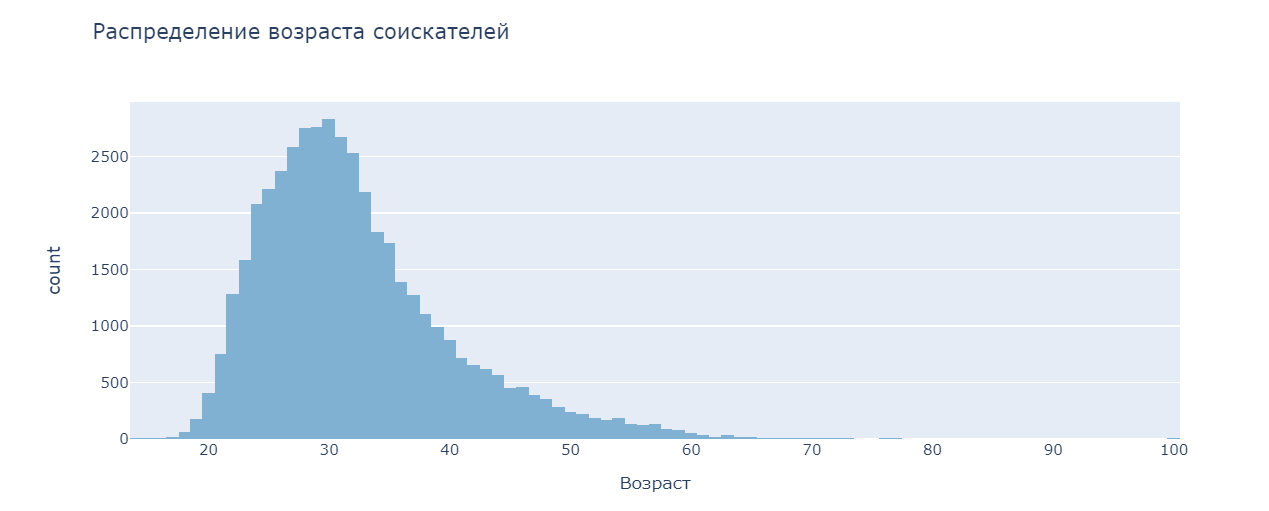

In [81]:
#Построим гистограмму распределения возраста 
fig = px.histogram(
    data_frame=hh_data,
    x='Возраст',
    height=450,
    width=1000,
    title='Распределение возраста соискателей',
    color_discrete_sequence=[px.colors.qualitative.Set3[4]]
)
fig.write_image("graphs/file_001.jpg")
Image.open('graphs/file_001.png')

Из графика мы можем наблюдать, что распределение нрмальное. Модальное значение возраста соискателей равен 30. Максимальный возраст равен 100 лет.
Осносной возраст соискателей лежит в границе от 17 до 60 лет.

In [82]:
#Чему равно модальное значение возраста соискателей?
hh_data['Возраст'].mode()

0    30
Name: Возраст, dtype: int64

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

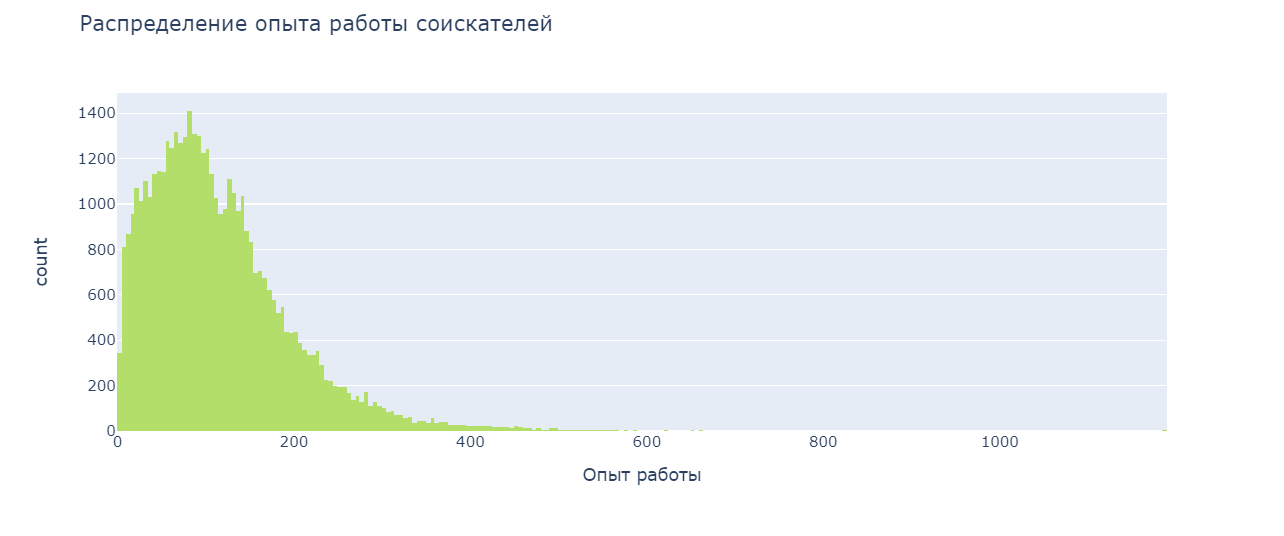

In [83]:
#Построим гистограмму распределение опыта работы
fig = px.histogram(
    data_frame=hh_data,
    x='Опыт работы',
    height=450,
    width=1000,
    title='Распределение опыта работы соискателей',
    color_discrete_sequence=[px.colors.qualitative.Set3[6]]
)
fig.write_image("graphs/file_002.jpg")
Image.open('graphs/file_002.png')

Из графика мы можем наблюдать, что распределение логарифмическое нормальное. Модальное значение равно 81 месяцу ( 6 лет и 9 месяцев).
Оснавной опыт работы соискателей лежит от 0 до 300 месяцев (25 лет).

In [84]:
#Чему равен максимальный опыт работы (в месяцах)?
hh_data['Опыт работы'].max()

1188.0

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


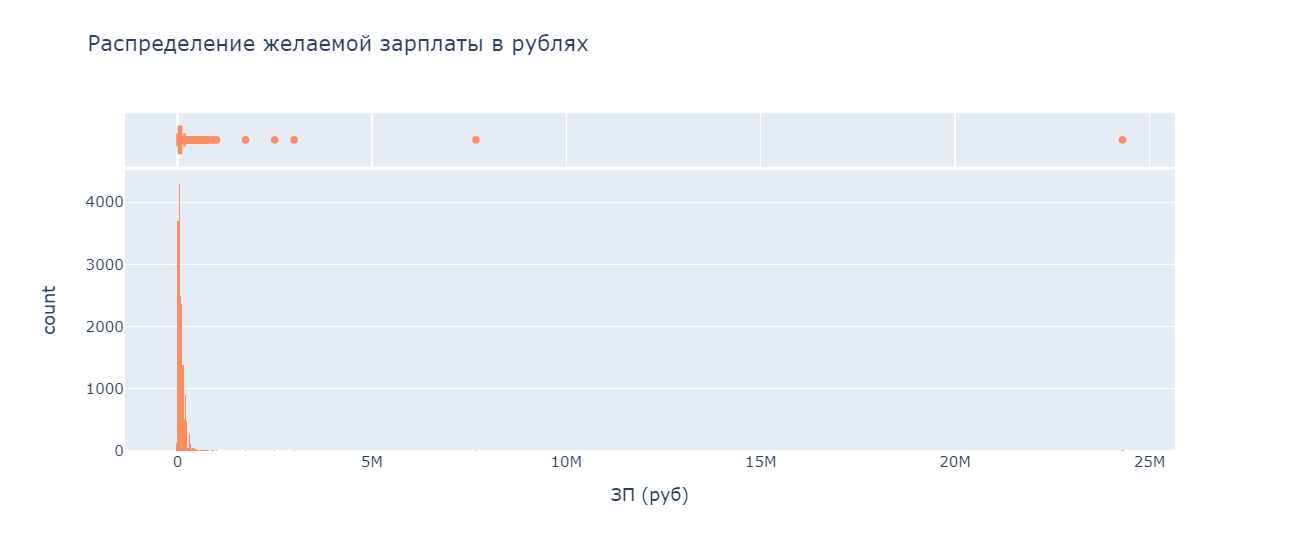

In [85]:
#Построим гистограмму распределение желаемой зарплаты
fig = px.histogram(
    data_frame=hh_data,
    x='ЗП (руб)',
    height=450,
    width=1000,    
    marginal='box',
    title='Распределение желаемой зарплаты в рублях',
    color_discrete_sequence=[px.colors.qualitative.Set2[1]]
)
fig.write_image("graphs/file_003.jpg")
Image.open('graphs/file_003.png')

Из графика мы можем наблюдать, что распределение логарифмическое. График неравномерный, скачкаобразный. Большинство людей предпочитают округлять желаемую зароботную плату до десятков тысяч (20к, 30к, 60к...). Модальное значение равно 50000 рублей. Минимальное 1, максимальное 24304876.
Оснавная зароботная плата лежит от 37 до 95 тысяч рублей .

In [86]:
#Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.
hh_data[hh_data['ЗП (руб)'] > 1000000]['ЗП (руб)'].count()  

5

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

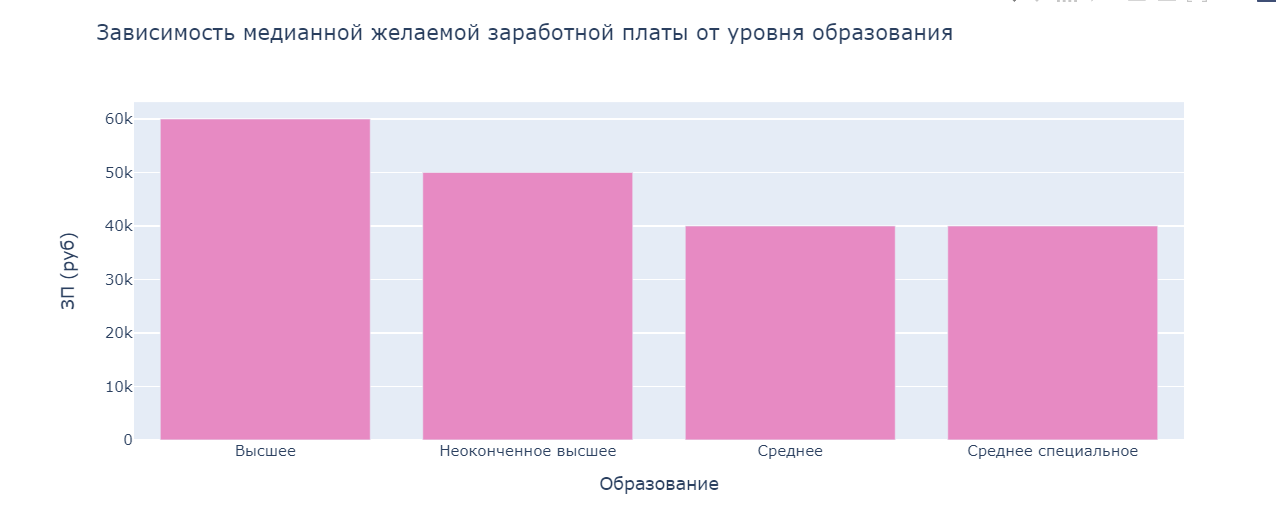

In [87]:
gg = hh_data[hh_data['ЗП (руб)']<1e6].groupby(['Образование'], as_index=False).median()
#Построим столбчатую диаграмму зависимость медианной желаемой заработной платы от уровня образования
fig = px.bar(
    data_frame=gg,
    y='ЗП (руб)',
    x="Образование",
    height=450,
    width=1000,
    title='Зависимость медианной желаемой заработной платы от уровня образования',
    color_discrete_sequence=[px.colors.qualitative.Set2[3]]
)
fig.write_image("graphs/file_004.jpg")
Image.open('graphs/file_004.png')

Из диаграммы мы можем наблюдать прямую зависимость роста зароботной платы с ростом уровня образования. Самая низкая зароботная платы у соискателей с среднем специальным образованием, самая высокая с высшим.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

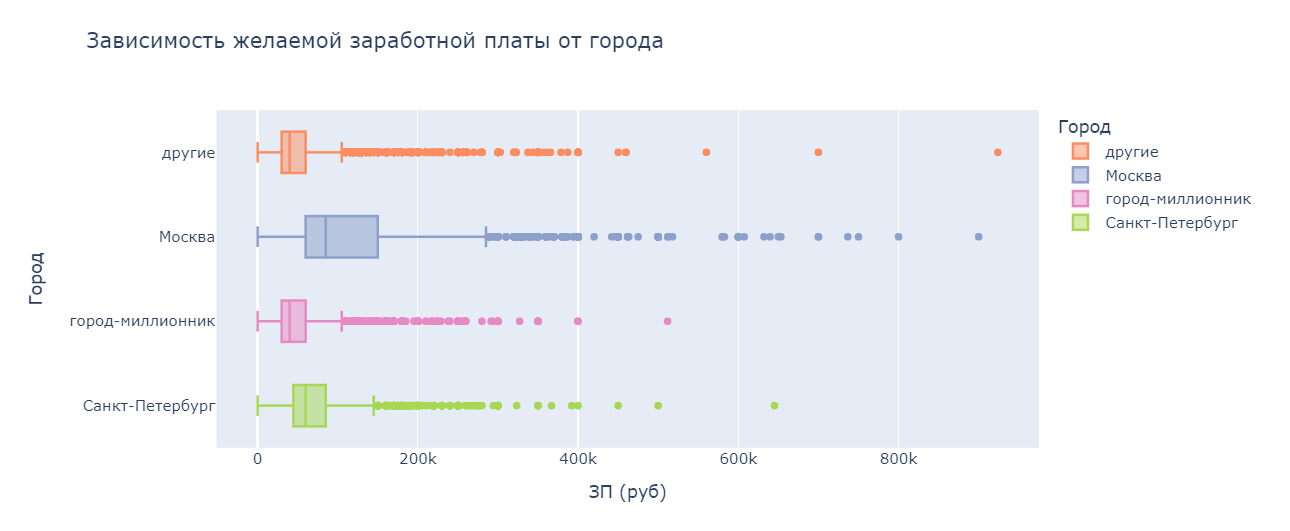

In [88]:
gg = hh_data[hh_data['ЗП (руб)']<1e6]
#Построим коробчатую диаграмму зависимости  желаемой заработной платы от города
fig = px.box(
    data_frame=gg,
    x='ЗП (руб)',
    y="Город",
    height=450,
    width=1000,
    color='Город',
    title='Зависимость желаемой заработной платы от города',
    color_discrete_sequence=[px.colors.qualitative.Set2[1],px.colors.qualitative.Set2[2],px.colors.qualitative.Set2[3],px.colors.qualitative.Set2[4],]
)
fig.write_image("graphs/file_005.jpg")
Image.open('graphs/file_005.png')

Из диаграммы мы можем наблюдать прямую зависимость роста зароботной платы с статуса города. Самая высокая зароботная платы у соискателей из столицы - Москвы, далее идет Санкт-Петербург, и остальные.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

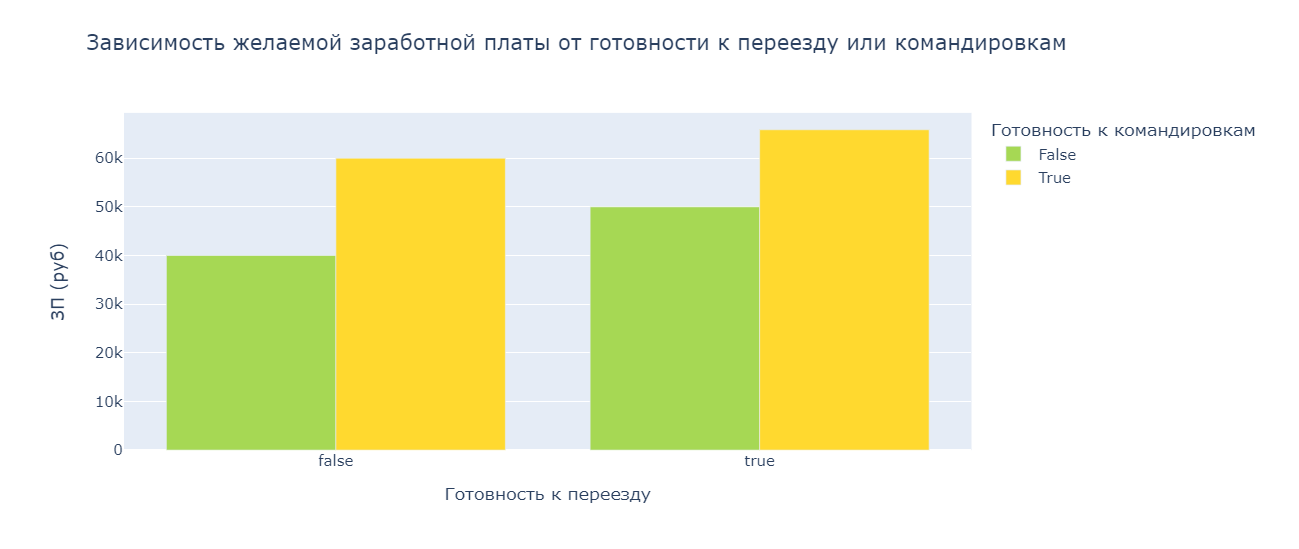

In [89]:
gg = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False).median()
#Построим столбчатую диаграмму зависимость  желаемой заработной платы от готовности к переезду или командировкам
fig = px.bar(
    data_frame=gg,
    y='ЗП (руб)',
    x='Готовность к переезду',
    height=450,
    width=1000,
    color='Готовность к командировкам',    
    barmode="group",
    title='Зависимость желаемой заработной платы от готовности к переезду или командировкам',
    color_discrete_sequence=[px.colors.qualitative.Set2[4], px.colors.qualitative.Set2[5]]
)
fig.write_image("graphs/file_006.jpg")
Image.open('graphs/file_006.png')

Из диаграммы мы можем наблюдать, что большинство соискателей готовы к переезду или командировкам. Соискателей готовых и к переезду и к командировкам около 66 тысяч.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Text(0.5, 1.0, 'Зависимость желаемой заработной платы от уровня образования и возраста')

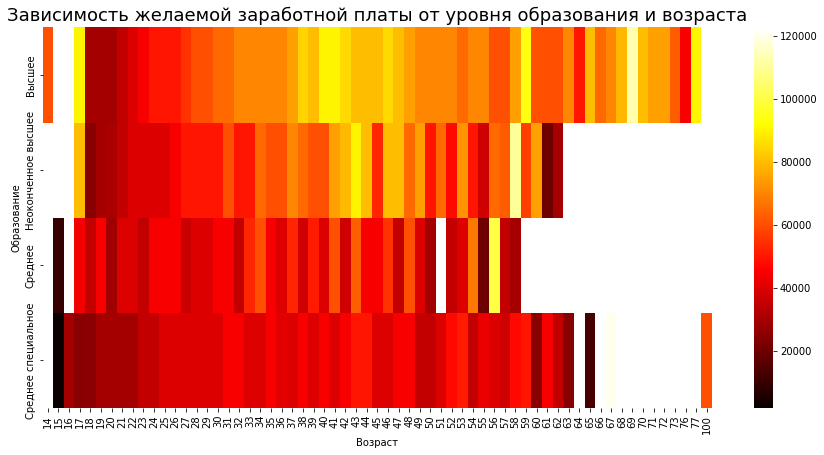

In [90]:
pivot = hh_data.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median'
)
#Построим тепловую карту зависимости  желаемой заработной платы от уровня образования и возраста
fig = plt.figure(figsize=(15, 7))
schedule = sns.heatmap(data=pivot, cmap='hot')
schedule.set_title('Зависимость желаемой заработной платы от уровня образования и возраста', size = 18)


Из тепловой карты мы видем что у соискателей с высшим образованием зароботная плата выше. Так же можем наблюдать что сначало с увеличением возраста зарплата ростет, а далее примерно после 45 начинает падать.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

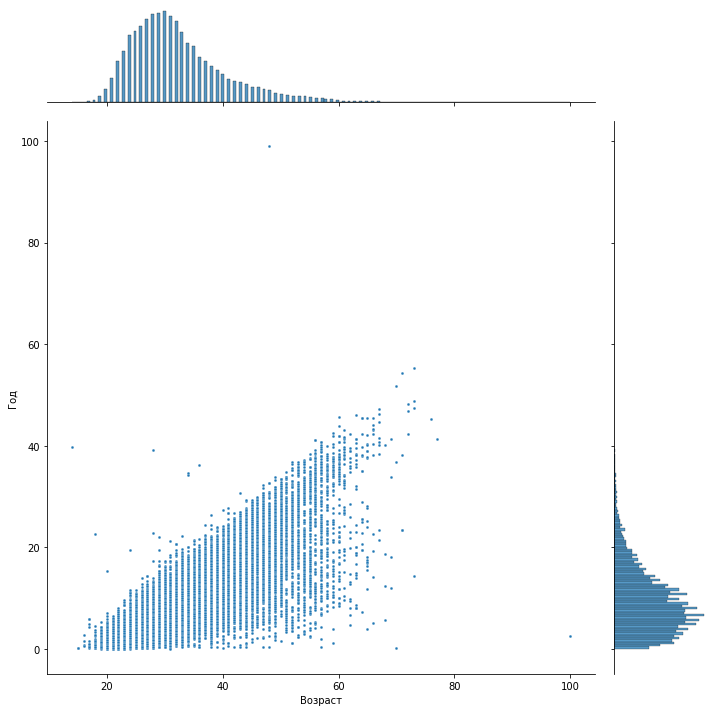

In [91]:
gg = hh_data.copy()
gg['Год'] = gg['Опыт работы']/12
fig = sns.jointplot(
    data=gg, 
    x='Возраст', 
    y='Год',
    height=10,
    s = 8
)

Из графика мы можем видеть прямую зависимость увеличения опыта от увеличения возраста соискателя. Так же мы можем заметить 7 аномалий в которых опыт работы больше возраста, чего не может быть.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


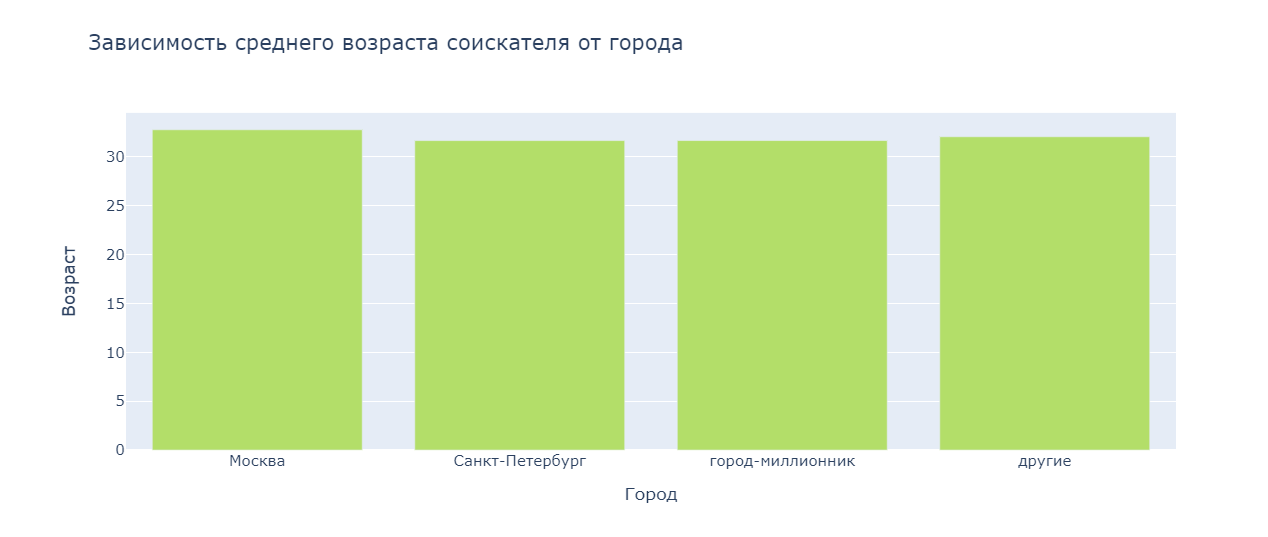

In [92]:
gg = hh_data.groupby(['Город'], as_index=False)['Возраст'].mean()
#Построим столбчатую диаграмму зависимость среднего возраста соискателя от города
fig = px.bar(
    data_frame=gg,
    x='Город',
    y="Возраст",
    height=450,
    width=1000,
    title='Зависимость среднего возраста соискателя от города',
    color_discrete_sequence=[px.colors.qualitative.Set3[6]]
)
fig.write_image("graphs/file_009.jpg")
Image.open('graphs/file_009.png')

Из графика видим что средний возраст соискателей примерно 32 года. Средний возраст во всех городах примерно одынаковый, отсюда мы делаем вывод что город не влияет на возраст.

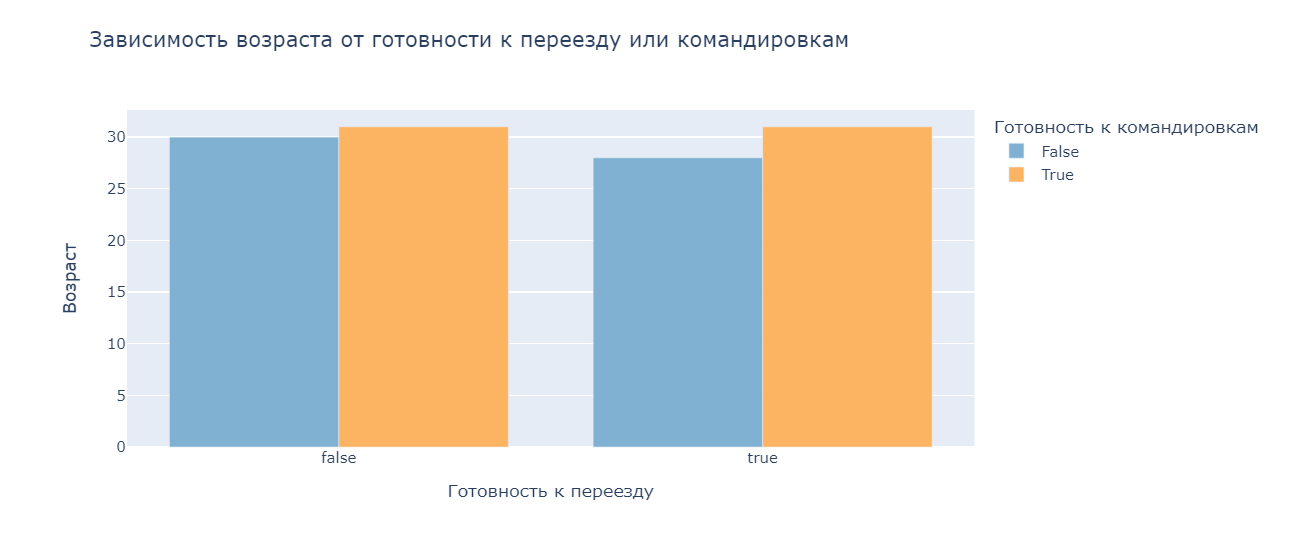

In [93]:
gg = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False).median()
#Построим столбчатую диаграмму зависимости возраста платы от готовности к переезду или командировкам
fig = px.bar(
    data_frame=gg,
    y='Возраст',
    x='Готовность к переезду',
    height=450,
    width=1000,
    color='Готовность к командировкам',    
    barmode="group",
    title='Зависимость возраста от готовности к переезду или командировкам',
    color_discrete_sequence=[px.colors.qualitative.Set3[4], px.colors.qualitative.Set3[5]]
)
fig.write_image("graphs/file_010.jpg")
Image.open('graphs/file_010.png')

Из графика зависимости возраста от готовности к переезду или командировкам мы видим что более молодые кондидаты больше готовы к командировкам или переезду.

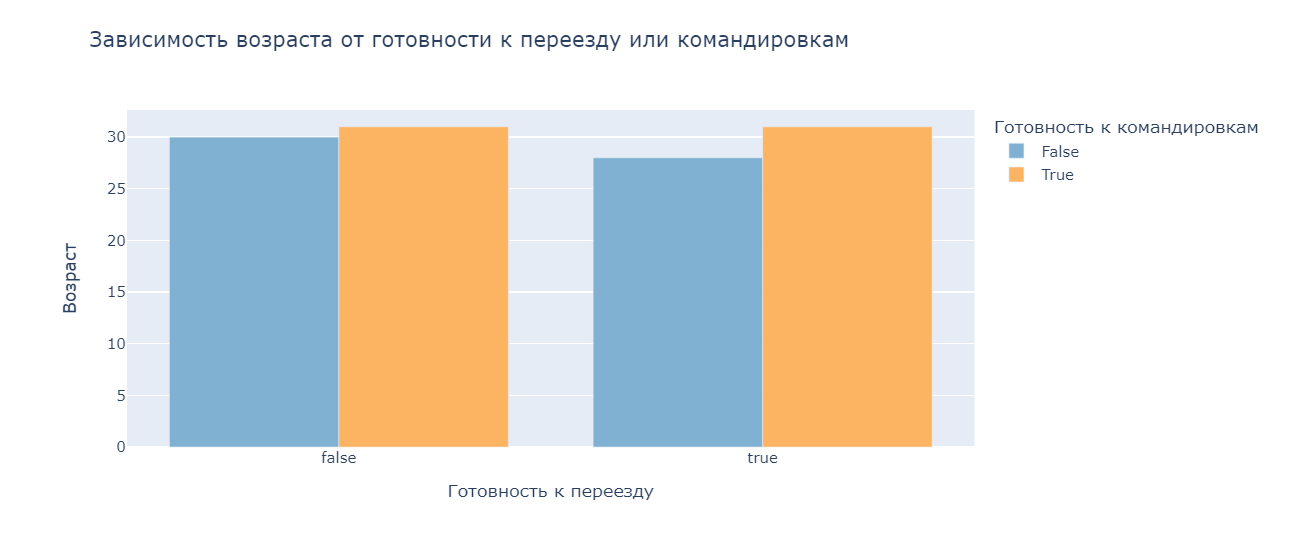

In [94]:
gg = hh_data[hh_data['ЗП (руб)']<1e6].groupby(['Пол'], as_index=False).mean()
#Построим столбчатую диаграмму зависимость средней желаемой заработной платы от пола соискателя
fig = px.bar(
    data_frame=gg,
    y='ЗП (руб)',
    x="Пол",
    height=450,
    width=1000,
    title='Зависимость средней желаемой заработной платы от пола соискателя',
    color_discrete_sequence=[px.colors.qualitative.Dark24[10]]
)
fig.write_image("graphs/file_010.jpg")
Image.open('graphs/file_010.png')

Из графика мы можем наблюдать что кондидаты мужчины требуют зароботную плату выше, чем кондитаты женщины. В среднем мужчины просят зарплату на 25% выше.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [95]:
hh_data.shape

(44744, 23)

In [96]:
hh_data = hh_data.drop_duplicates(subset=list(hh_data.columns))
hh_data.shape

(44583, 23)

Было выявлено и удалено 161 дубликат.

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [97]:
hh_data.isnull().mean().sort_values(ascending=False)

Опыт работы                        0.003768
Готовность к командировкам         0.001705
Последняя/нынешняя должность       0.000045
Последнее/нынешнее место работы    0.000022
частичная занятость                0.000000
вахтовый метод                     0.000000
удаленная работа                   0.000000
гибкий график                      0.000000
сменный график                     0.000000
полный день                        0.000000
стажировка                         0.000000
волонтерство                       0.000000
проектная работа                   0.000000
Ищет работу на должность:          0.000000
полная занятость                   0.000000
Готовность к переезду              0.000000
Город                              0.000000
Возраст                            0.000000
Пол                                0.000000
Образование                        0.000000
Авто                               0.000000
Обновление резюме                  0.000000
ЗП (руб)                        

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [98]:
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_data['Опыт работы'] = hh_data['Опыт работы'].fillna(hh_data['Опыт работы'].median())
round(hh_data['Опыт работы'].mean())

114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [99]:
hh_data = hh_data.drop(hh_data[(hh_data['ЗП (руб)'] > 1e6) | (hh_data['ЗП (руб)'] < 1e3)].index)
hh_data.shape

(44492, 23)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [100]:
hh_data = hh_data.drop(hh_data[hh_data['Возраст'] < hh_data['Опыт работы']/12].index)
hh_data.shape

(44485, 23)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

NameError: name 'data' is not defined

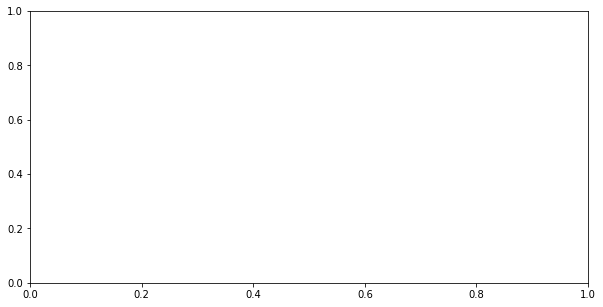

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
gg = np.log(data['Возраст'] + 1)
histplot = sns.histplot(gg, bins=30, ax=ax)
histplot.axvline(gg.mean()+ 4 *gg.std(), color='k',  lw=1)
histplot.axvline(gg.mean()- 3 *gg.std(), color='k',  lw=1)
histplot.set_title('Pаспределение признака в логарифмическом масштабе', size = 15);


Из диаграммы видно, что логарифмическое распределение имеет ассиметрию в правую сторону.

In [ ]:
def outliers_z_score_mod(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
    

outliers, cleaned = outliers_z_score_mod(hh_data, 'Возраст', right = 4, log_scale=True)
outliers.shape[0]


3

In [ ]:
hh_data = hh_data.drop(outliers.index)
hh_data.shape

(44482, 23)

С помощью Z-метода было обнаружено и удалено 3 выброса.